In [20]:
# Import das bibliotecas necessárias para o aprendizado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns

# Classificadores e afins..
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score

from six import StringIO
from IPython.display import Image

In [21]:
# Lendo  o arquivo CSV que contém o dataset escolhido, o qual está disponível em ../dataset/healthcare-dataset-stroke-data.csv
df = pd.read_csv('../dataset/healthcare-dataset-stroke-data.csv', sep=',', index_col=0, na_values='?')
#dataset

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [23]:
# fill bmi null values with mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [24]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [25]:
# countplot de stroke.


<AxesSubplot:xlabel='stroke', ylabel='count'>

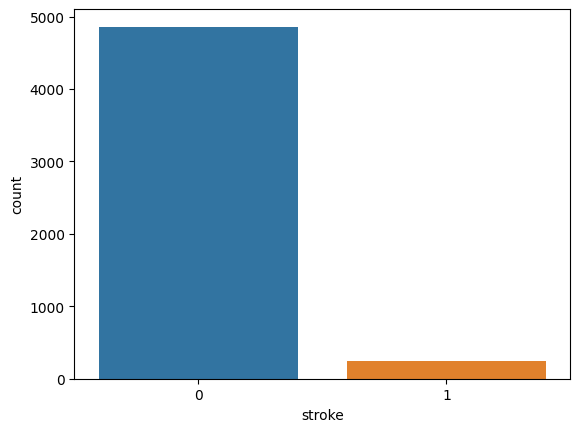

In [26]:
# countplot percentage of stroke
sns.countplot(x='stroke', data=df)

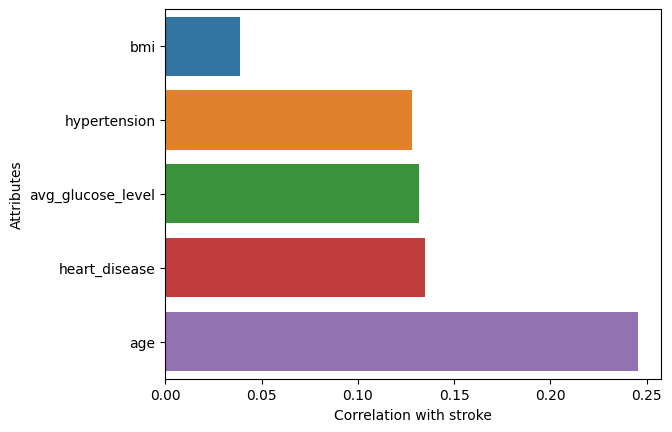

In [27]:
corr = df.corr()["stroke"].sort_values(ascending=True)
corr.drop("stroke", inplace=True)

sns.barplot(x=corr, y=corr.index)
plt.ylabel('Attributes')
plt.xlabel('Correlation with stroke')
plt.show()

In [28]:
df_d = pd.get_dummies(df)


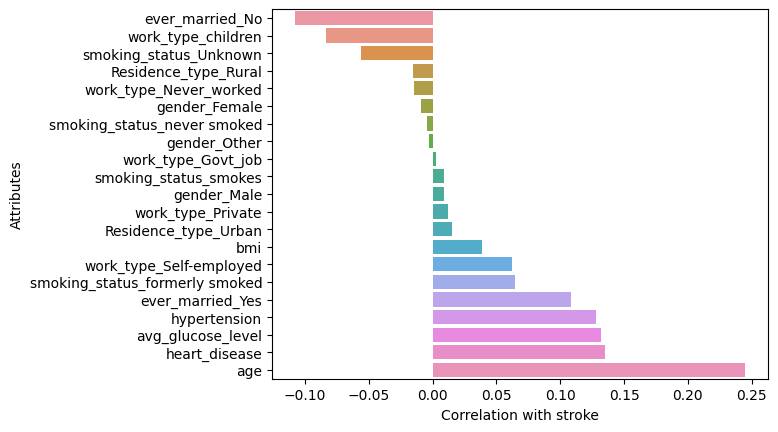

In [29]:
corr = df_d.corr()["stroke"].sort_values(ascending=True)
corr.drop("stroke", inplace=True)

sns.barplot(x=corr, y=corr.index)
plt.ylabel('Attributes')
plt.xlabel('Correlation with stroke')
plt.show()

In [30]:
corr = df_d.corr()["stroke"].sort_values(ascending=True)

In [31]:
corr

ever_married_No                  -0.108340
work_type_children               -0.083869
smoking_status_Unknown           -0.055892
Residence_type_Rural             -0.015458
work_type_Never_worked           -0.014882
gender_Female                    -0.009027
smoking_status_never smoked      -0.004129
gender_Other                     -0.003166
work_type_Govt_job                0.002677
smoking_status_smokes             0.008939
gender_Male                       0.009117
work_type_Private                 0.011888
Residence_type_Urban              0.015458
bmi                               0.038947
work_type_Self-employed           0.062168
smoking_status_formerly smoked    0.064556
ever_married_Yes                  0.108340
hypertension                      0.127904
avg_glucose_level                 0.131945
heart_disease                     0.134914
age                               0.245257
stroke                            1.000000
Name: stroke, dtype: float64

In [32]:
# filter only the attributes with correlation greater than 0.1
corr = corr[abs(corr) > 0.05]
corr

ever_married_No                  -0.108340
work_type_children               -0.083869
smoking_status_Unknown           -0.055892
work_type_Self-employed           0.062168
smoking_status_formerly smoked    0.064556
ever_married_Yes                  0.108340
hypertension                      0.127904
avg_glucose_level                 0.131945
heart_disease                     0.134914
age                               0.245257
stroke                            1.000000
Name: stroke, dtype: float64

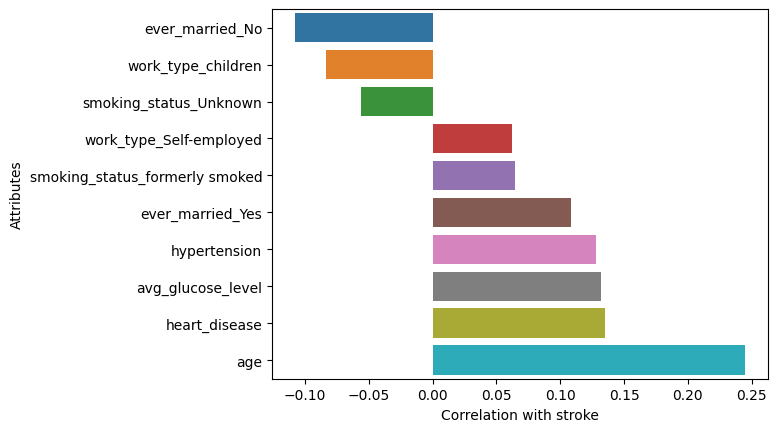

In [33]:
corr.drop("stroke", inplace=True)
sns.barplot(x=corr, y=corr.index)
plt.ylabel('Attributes')
plt.xlabel('Correlation with stroke')
plt.show()

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [35]:

# drop the columns with correlation less than 0.05
corr


In [37]:

df = df.drop(columns = ['gender', 'bmi', 'Residence_type'])

KeyError: "['gender', 'bmi', 'Residence_type'] not found in axis"

In [38]:
df

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
id,,,,,,,,
9046,67.0,0,1,Yes,Private,228.69,formerly smoked,1
51676,61.0,0,0,Yes,Self-employed,202.21,never smoked,1
31112,80.0,0,1,Yes,Private,105.92,never smoked,1
60182,49.0,0,0,Yes,Private,171.23,smokes,1
1665,79.0,1,0,Yes,Self-employed,174.12,never smoked,1
...,...,...,...,...,...,...,...,...
18234,80.0,1,0,Yes,Private,83.75,never smoked,0
44873,81.0,0,0,Yes,Self-employed,125.20,never smoked,0
19723,35.0,0,0,Yes,Self-employed,82.99,never smoked,0


In [39]:
df_d = pd.get_dummies(df)

In [40]:
plt.figure(figsize=(18, 15))
sns.heatmap(dataset.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

NameError: name 'dataset' is not defined

<Figure size 1800x1500 with 0 Axes>

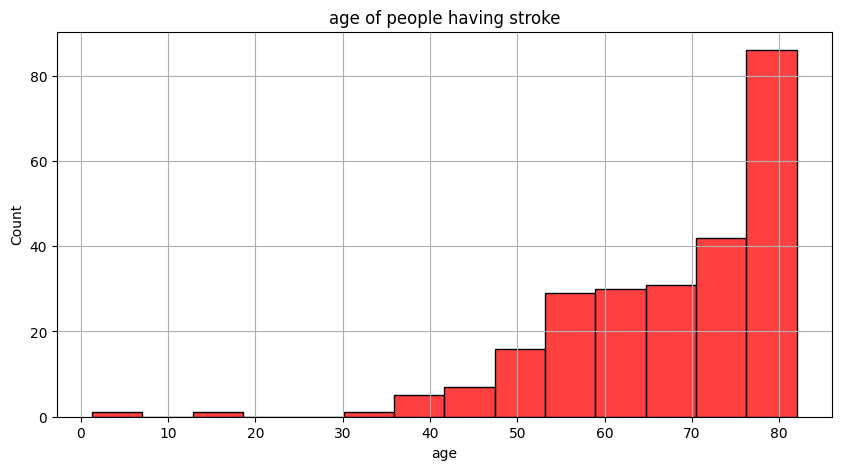

In [41]:
plt.figure(figsize=(10,5))
strokes_dataset = df[df['stroke'] == 1]
sns.histplot(strokes_dataset['age'], color="red")
plt.title("age of people having stroke")
plt.grid()

In [42]:
# Separando o dataset no conjunto de atributos X e classe y.
X = df_d.loc[:, df_d.columns != 'stroke']
y = np.array(df_d.loc[:, df_d.columns == 'stroke']).ravel()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [44]:
clf = DecisionTreeClassifier(criterion='gini', random_state=42)  # Criando o classificador da Árvore de Decisão

In [45]:
dt_scores = cross_val_score(clf, X, y, cv=10)
dt_scores

array([0.92172211, 0.90410959, 0.90802348, 0.92172211, 0.90215264,
       0.90019569, 0.89432485, 0.91389432, 0.92172211, 0.90802348])

In [46]:
tree_classifier_accuracy = dt_scores.mean()
print(f'A acurácia do Classificador é: {tree_classifier_accuracy :.2%}')

A acurácia do Classificador é: 90.96%


In [47]:
parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
gs.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [49]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [50]:
knn_classifier_accuracy = gs.best_score_
print(f'A acurácia do Classificador é: {knn_classifier_accuracy :.2%}')

A acurácia do Classificador é: 95.11%


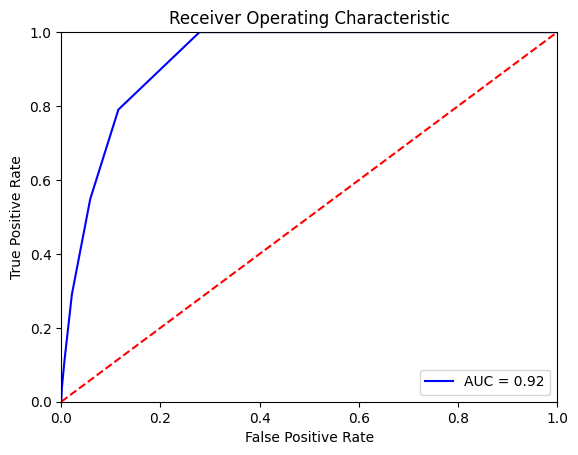

In [52]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
